# AE 370 Code document

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (arbitrary values for testing)
m1, m2 = 1.0, 1.0  # masses
l1, l2 = 1.0, 1.0  # lengths
g = 9.81           # gravity

# Time parameters
t_max = 10  # simulation time in seconds
dt_rk4 = 0.01  # RK4 time step
dt_ref = 0.0001  # Reference solution time step

# Initial conditions: [theta1, omega1, theta2, omega2]
y0 = np.array([np.pi / 4, 0, np.pi / 2, 0])


def equations(t, y):
    theta1, omega1, theta2, omega2 = y

    delta = theta2 - theta1

    A = np.array([
        [l2, l1 * np.cos(delta)],
        [(m1 + m2) * l1, m2 * l2 * np.cos(delta)]
    ])

    b = np.array([
        -l1 * omega1**2 * np.sin(delta) - g * np.sin(theta2),
        m2 * l2 * omega2**2 * np.sin(delta) - (m1 + m2) * g * np.sin(theta1)
    ])

    acc = np.linalg.solve(A, b)  # Solve for accelerations

    return np.array([omega1, acc[0], omega2, acc[1]])

def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + dt / 2, y + k1 / 2)
    k3 = dt * f(t + dt / 2, y + k2 / 2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6


def solve_rk4(y0, dt, t_max):
    t_values = np.arange(0, t_max, dt)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0 

    for i in range(1, len(t_values)):
        y_values[i] = rk4_step(equations, t_values[i-1], y_values[i-1], dt)

    return t_values, y_values

def total_energy(state, params):
    """ Computes the total energy of the system """
    theta1, omega1, theta2, omega2 = state
    l1, l2, m1, m2, g = params
    
    y1 = -l1 * np.cos(theta1)
    y2 = y1 - l2 * np.cos(theta2)
    
    v1_sq = (l1 * omega1) ** 2
    v2_sq = v1_sq + (l2 * omega2) ** 2 + 2 * l1 * l2 * omega1 * omega2 * np.cos(theta1 - theta2)
    
    KE = 0.5 * m1 * v1_sq + 0.5 * m2 * v2_sq
    PE = m1 * g * y1 + m2 * g * y2
    
    return KE + PE

In [11]:
# Compute True Solution
t_ref, y_ref = solve_rk4(y0, dt_ref, t_max)


[0.05]
[ 0.52160147  3.79835272 -0.3909097  -0.68195084]


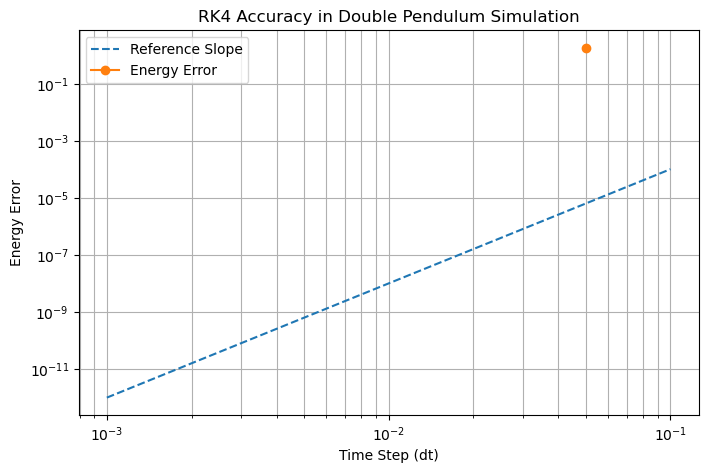

[np.float64(1.8046725984454088)]


In [ ]:
parameters = l1, l2, m1, m2, g

dt_values = [0.05]
#dt_values = np.logspace(-3, -1, 20) # Uncomment to do full analysis (20 minutes)

# Compute reference energy
E_ref = total_energy(y_ref[-1],parameters)

energy_errors = []
for dt in dt_values:
    t_rk4, y_rk4 = solve_rk4(y0, dt, t_max)
    E_rk4 = total_energy(y_rk4[-1],parameters)
    error = np.abs(E_rk4 - E_ref)  # Deviation from initial energy
    energy_errors.append(error)

# Compute reference error line
ref_error_x = np.logspace(-3,-1,20)
ref_error_y = ref_error_x**4

# Plot energy deviation for different dt values
plt.figure(figsize=(8, 5))
plt.loglog(ref_error_x, ref_error_y, '--', label='Reference Slope')
plt.loglog(dt_values, energy_errors, '-o', label='Energy Error')
plt.xlabel("Time Step (dt)")
plt.ylabel("Energy Error")
plt.title("RK4 Accuracy in Double Pendulum Simulation")
plt.legend()
plt.grid(True, which='both')
plt.show()

print(energy_errors)